In [1]:
index_exp = 2

In [2]:
# magic lines that avoid re-start 
%load_ext autoreload
%autoreload 2

In [3]:
import pybamm as pb;import pandas as pd   ;import numpy as np;
import os; import seaborn as sns
import matplotlib.pyplot as plt;import os;import imageio
from scipy.io import savemat,loadmat;from pybamm import constants,exp;import matplotlib as mpl; fs=17; # or we can set import matplotlib.pyplot as plt then say 'mpl.rc...'
import openpyxl
import traceback
import multiprocessing
import scipy.optimize
import timeit
import random;import time, signal
fs=17; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)

In [4]:
# define global index and dict for all experiment data - prepare for read!
Exp_Path = [
    "Expt 1 - Si-based Degradation/",
    "Expt 2,2 - C-based Degradation 2/",
    "Expt 3 - Cathode Degradation and Li-Plating/",
    "Expt 4 - Drive Cycle Aging (Control)/",
    "Expt 5 - Standard Cycle Aging (Control)/",]
Exp_head = [
    "Expt 1",
    "Expt 2,2",
    "Expt 3",
    "Expt 4",
    "Expt 5",]
Exp_1_Cell = ["A","B","J","D","E","F","K","L","M"];
Exp_1_Temp = {
    "A":"10","B":"10","J":"10",
    "D":"25","E":"25","F":"25",
    "K":"40","L":"40","M":"40",}
Temp_Cell_Exp_1 = {
    "10":["A","B","J"],
    "25":["D","E","F"],
    "40":["K","L","M"],}
Exp_2_Cell = ["A","B","C","D","E","F"];
Exp_2_Temp = {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",}
Temp_Cell_Exp_2 = {
    "10":["A","B"],
    "25":["C","D"],
    "40":["E","F"],}
Exp_3_Cell = ["A","B","C","D","E","F","G","H","I"];
Exp_3_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25","F":"25",
    "G":"40","H":"40","I":"40"}
Temp_Cell_Exp_3 = {
    "10":["A","B","C"],
    "25":["D","E","F"],
    "40":["G","H","I"],}
Exp_4_Cell = ["A","B","C","D","E","F","G","H"];
Exp_4_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_4 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_5_Cell = ["A","B","C","D","E","F","G","H"];
Exp_5_Temp = {
    "A":"10","B":"10","C":"10",
    "D":"25","E":"25",
    "F":"40","G":"40","H":"40",}
Temp_Cell_Exp_5 = {
    "10":["A","B","C"],
    "25":["D","E",],
    "40":["F","G","H"],}
Exp_All_Cell  = [Exp_1_Cell,Exp_2_Cell,Exp_3_Cell,Exp_4_Cell,Exp_5_Cell]
Exp_Temp_Cell = [Exp_1_Temp,Exp_2_Temp,Exp_3_Temp,Exp_4_Temp,Exp_5_Temp]
Temp_Cell_Exp_All = [Temp_Cell_Exp_1,Temp_Cell_Exp_2,Temp_Cell_Exp_3,Temp_Cell_Exp_4,Temp_Cell_Exp_5]
Mark_Cell_All = [
    {
    "A":"o","B":">","J":"v",
    "D":"o","E":">","F":"v",
    "K":"o","L":">","M":"v",},
    {
    "A":"10","B":"10",
    "C":"25","D":"25",
    "E":"40","F":"40",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">","F":"v",
    "G":"o","H":">","I":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",},
    {
    "A":"o","B":">","C":"v",
    "D":"o","E":">",
    "F":"o","G":">","H":"v",}]
Color_Cell_All = [
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"J":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "K":[1,0,0,0.4],"L":[1,0,0,0.4],"M":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"C":[0, 0, 0,0.7],
    "E":[1,0,0,0.4],"F":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],"F":[0, 0, 0,0.7],
    "G":[1,0,0,0.4],"H":[1,0,0,0.4],"I":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],},
    {
    "A":[2/255, 3/255, 226/255,0.7],"B":[2/255, 3/255, 226/255,0.7],"C":[2/255, 3/255, 226/255,0.7],
    "D":[0, 0, 0,0.7],"E":[0, 0, 0,0.7],
    "F":[1,0,0,0.4],"G":[1,0,0,0.4],"H":[1,0,0,0.4],}]


In [5]:
# ready experiment data
import sys  
str_path_0 = os.path.abspath(os.path.join(pb.__path__[0],'..'))
str_path_1 = os.path.abspath(os.path.join(str_path_0,"wip/Rio_Code/Fun_P2"))
sys.path.append(str_path_1) 
from Fun_P2 import * # directly do this for HPC
# Load Niall's data
Path_NiallDMA = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/InputData/") 
Temp_Cell_Exp = Temp_Cell_Exp_All[index_exp-1] 
Exp_Any_AllData = Read_Exp(
    Path_NiallDMA,Exp_All_Cell[index_exp-1],
    Exp_Path,Exp_head,Exp_Temp_Cell[index_exp-1],
    index_exp-1)

Read Exp-2 - Cell A RPT 0
Read Exp-2 - Cell A RPT 1
Read Exp-2 - Cell A RPT 2
Read Exp-2 - Cell A RPT 3
Read Exp-2 - Cell A RPT 4
Read Exp-2 - Cell A RPT 5
Read Exp-2 - Cell A RPT 6
Read Exp-2 - Cell A RPT 7
Read Exp-2 - Cell A RPT 8
Read Exp-2 - Cell A RPT 9
Read Exp-2 - Cell A RPT 10
Read Exp-2 - Cell A RPT 11
Read Exp-2 - Cell A RPT 12
Exp-2 - Cell A doesn't have RPT 13
Exp-2 - Cell A doesn't have RPT 14
Exp-2 - Cell A doesn't have RPT 15
Read Exp-2 - Cell B RPT 0
Read Exp-2 - Cell B RPT 1
Read Exp-2 - Cell B RPT 2
Read Exp-2 - Cell B RPT 3
Read Exp-2 - Cell B RPT 4
Read Exp-2 - Cell B RPT 5
Read Exp-2 - Cell B RPT 6
Read Exp-2 - Cell B RPT 7
Read Exp-2 - Cell B RPT 8
Read Exp-2 - Cell B RPT 9
Read Exp-2 - Cell B RPT 10
Read Exp-2 - Cell B RPT 11
Read Exp-2 - Cell B RPT 12
Exp-2 - Cell B doesn't have RPT 13
Exp-2 - Cell B doesn't have RPT 14
Exp-2 - Cell B doesn't have RPT 15
Read Exp-2 - Cell C RPT 0
Read Exp-2 - Cell C RPT 1
Read Exp-2 - Cell C RPT 2
Read Exp-2 - Cell C RPT 3
Read

In [6]:
BasicPath = os.path.expanduser(
    "~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/Full/Full_Exp23_Paper_7_1") # for Linux 
# Reload all scans     
Big_start = 1; Big_end = 12; case_no=3; 
purpose_i = "Full_Exp23_Paper_7_1"
Scan_start_all = (
    np.arange(Big_start,Big_end+1,case_no)
    ).tolist()
Scan_end_all = (
    np.arange(Big_start+case_no-1,Big_end+case_no,case_no)
    ).tolist()


In [7]:
import json
def Read_Model_BestFit(BasicPath,option,Scan_start,Scan_end,Pick,purpose_i,):
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    path_i=BasicPath+option+"/"+purpose_i+"/"+purpose+"/Mats/"+f"{Pick}-StructData.json"
    #print(path_i)
    with open(path_i, 'r') as file:
        data = json.load(file)
    return data

BasicPath = os.path.expanduser("~/EnvPBGEM_Linux/SimSave/P2_R9_Dim/") 

In [9]:
path_i=BasicPath+"SEI/SEI_Exp23_Paper_5/SEI_Exp23_Paper_5_Case_85_87/Mats/85-StructData.json"
#print(path_i)
with open(path_i, 'r') as file:
    data_5_85 = json.load(file)

In [10]:
path_i=BasicPath+"SEI/SEI_Exp23_Paper_6/SEI_Exp23_Paper_6_Case_7_9/Mats/7-StructData.json"
#print(path_i)
with open(path_i, 'r') as file:
    data_6_7 = json.load(file)

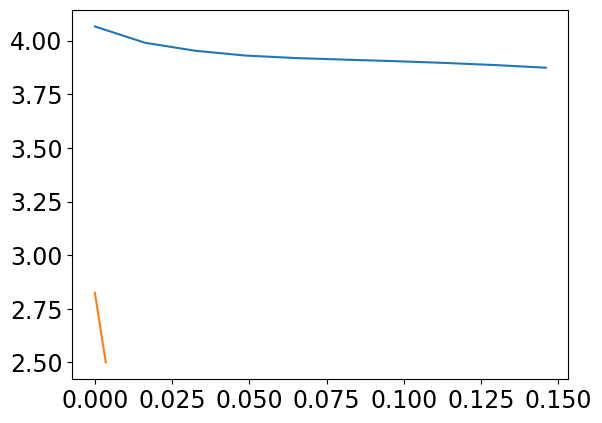

In [20]:
plt.plot(
    np.array(data_5_85["CD Time [h]"][0])-data_5_85["CD Time [h]"][0][0],
    data_5_85["CD Terminal voltage [V]"][0])
plt.plot(
    np.array(data_6_7["CD Time [h]"][0])-data_6_7["CD Time [h]"][0][0],
    data_6_7["CD Terminal voltage [V]"][0])

In [21]:
data_6_7["CD Terminal voltage [V]"]

[[2.8248275732311177, 2.5000099999999996],
 [3.3531588782593995,
  3.2498846577875007,
  3.218977864390099,
  3.1794439771877756,
  3.1293320243135385,
  3.076666678155869,
  3.0206139978413735,
  2.944779510021486,
  2.8110873751984315,
  2.5070413220411822],
 [3.354318970604334,
  3.2507293977467313,
  3.2198251774191897,
  3.1803389173264116,
  3.1302668396175966,
  3.077626954765776,
  3.0216173232865415,
  2.945880640090041,
  2.812438272153374,
  2.509173833264782],
 [3.355386679526285,
  3.2515058899102427,
  3.2205974667126034,
  3.181147643989003,
  3.131108681191409,
  3.078491189732572,
  3.0225166516644046,
  2.9468582416348807,
  2.813616331895349,
  2.5109611024167195],
 [3.3563832580227064,
  3.252230546233305,
  3.2213128917309777,
  3.1818928391369505,
  3.1318829625993994,
  3.0792859571767304,
  3.023340742976484,
  2.9477488113046704,
  2.814677203467175,
  2.5125411124540067],
 [3.3573223373512935,
  3.252911584749354,
  3.2219824707180966,
  3.182588095449571,
  3

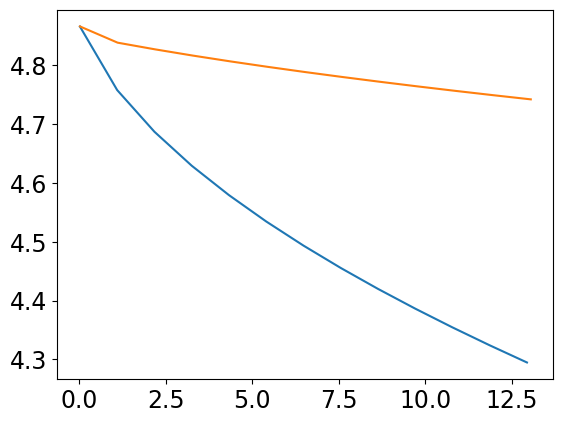

In [22]:
plt.plot(data_5_85["Throughput capacity [kA.h]"],data_5_85["Discharge capacity [A.h]"],)
plt.plot(data_6_7["Throughput capacity [kA.h]"],data_6_7["Discharge capacity [A.h]"],)

In [11]:
data_5_85["Discharge capacity [A.h]"]

[4.866113593428315,
 4.757906301670378,
 4.686989790715502,
 4.629242713557492,
 4.579190017666384,
 4.5343476995832965,
 4.493341835171744,
 4.4553280109514235,
 4.419731994215666,
 4.3861339882848,
 4.354223504054638,
 4.323766006539173,
 4.294580504767202]

In [12]:
data_6_7["Discharge capacity [A.h]"]

[4.866113593428313,
 4.838567516295935,
 4.827171899157277,
 4.816622589454157,
 4.806735325238361,
 4.797395392474141,
 4.788517042323703,
 4.780037025106683,
 4.771903601994227,
 4.7640780224390635,
 4.756526705691061,
 4.749222565455942,
 4.7421425959054995]

In [ ]:
# Post-processing - using ML knowledge
# Read the Excel file into a DataFrame
result_df = pd.read_excel(BasicPath+"/" + excel_name + ".xlsx")
result_df


In [ ]:
column_mapping = {
    "Ageing temperature":"T",  
    "SOH":"Cap loss [A.h]",  

    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
    "Negative electrode diffusivity activation energy [J.mol-1]":"Eact_Ds_Neg",
}
# Rename the columns using the mapping   - Error_1~6;   Para_1~8
result_df = result_df.rename(columns=column_mapping)

In [ ]:
result_df_10 = result_df[result_df['T'] == 10]
result_df_25 = result_df[result_df['T'] == 25]
result_df_40 = result_df[result_df['T'] == 40]
result_df_40 = result_df_40[result_df_40["Punish"] <= 1]


In [ ]:
fs=12; # python -m ipykernel install --user --name=EnvPBGEM_Linux --display-name "Python_Linux"
# SOH	LLI to LiP %	LLI to SEI %	LLI to sei-on-cracks %	LAM to Neg %	LAM to Pos %		Width Final
font = {'family' : 'DejaVu Sans','size'   : fs}
mpl.rc('font', **font)
import seaborn as sns

def PlotPair(df, input_columns, output_column,plot_title, plot_size,colormap_scale):
    # Create a DataFrame with only the input and output columns
    data_scale = df[input_columns + [output_column]]
    # Create the pair plot
    g = sns.pairplot(
        data_scale, vars=input_columns, hue=output_column,
        diag_kind='kde', plot_kws={'alpha': 0.6}, palette='cool', )

    # Set x-axis and y-axis scales to log scale
    for ax in g.axes.flat:
        ax.set_xscale('log')
        ax.set_yscale('log')
    
    g.fig.suptitle(plot_title, y=1.02)  # Adjust the title's position
    g.fig.set_size_inches(plot_size)

    return
input_columns = ["Eact_SEI","Eact_Ds_Neg",]; output_column="LLI to LiP %"
plot_size=(8, 5);   colormap_scale = [0.38, 0.95]
PlotPair(result_df_10, input_columns, output_column,"10degC", plot_size,colormap_scale)
PlotPair(result_df_25, input_columns, output_column,"25degC", plot_size,colormap_scale)
PlotPair(result_df_40, input_columns, output_column,"40degC", plot_size,colormap_scale)

In [ ]:
PlotPair(result_df, input_columns, output_column="Width Final")

In [ ]:
PlotPair(result_df, input_columns, output_column="Cap Loss")

In [ ]:
ranked_rows = result_df.sort_values(by='Error Tot%')
ranked_rows = ranked_rows[ranked_rows['Error Tot%'] < 5]
selected_short = ranked_rows[["Scan No","Ageing temperature",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap Loss","LLI to LiP","LLI to SEI","LAM to Neg","LAM to Pos",
    "Width Final"]]
column_mapping = {
    "Ageing temperature":"T",  
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
}
selected_short = selected_short.rename(
    columns=column_mapping)
selected_short.to_excel(BasicPath+'/selected_rows2.xlsx', index=False)

In [ ]:
selected_rows = pd.DataFrame()
for i in range(1, 200):
    selected_row_i = pd.DataFrame()
    if (i in result_df['Scan No'].values) and ((200 + i) in result_df['Scan No'].values) and ((400 + i) in result_df['Scan No'].values):
        selected_row_i = result_df[result_df['Scan No'].isin([i, 200 + i, 400 + i])]
        selected_rows = pd.concat([selected_rows, selected_row_i])
        #print(i)
selected_rows['Cap_loss/Punish'] = selected_rows['Cap Loss'] * selected_rows['Punish']
selected_short = selected_rows[["Scan No","Ageing temperature","Punish",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]', 
    'Dead lithium decay constant [s-1]',
    'Lithium plating kinetic rate constant [m.s-1]',
    'Outer SEI partial molar volume [m3.mol-1]', 
    'SEI growth activation energy [J.mol-1]',
    "Cap_loss/Punish"]]
column_mapping = {
    "Ageing temperature":"T",
    "SEI growth activation energy [J.mol-1]":"Eact_SEI",
    'Inner SEI lithium interstitial diffusivity [m2.s-1]':"Dint", 
    'Dead lithium decay constant [s-1]':"Decay",
    'Lithium plating kinetic rate constant [m.s-1]':"k_LiP",
    'Outer SEI partial molar volume [m3.mol-1]':"V_sei", 
}
selected_short = selected_short.rename(
    columns=column_mapping)
print(selected_short)
selected_short.to_excel(BasicPath+'/selected_rows.xlsx', index=False)

In [ ]:
#
import json

# plot inside the function:
def Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi):

    All_Scans = {}
    selected_rows = result_df[result_df['Scan No']==Selected]
    index_exp = selected_rows["Exp No."]
    index_exp = int(index_exp.iloc[0])
    Temp = selected_rows['Ageing temperature']
    Temp = float(Temp.iloc[0])
    scan = Selected
    Scan_start = ((scan - 1) // 10) * 10 + 1
    Scan_end = Scan_start + 9 
    purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
    Target  = f'/{purpose}/'
    model_options = selected_rows['Model option']
    model_options = str(model_options.iloc[0])
    fig, axs = plt.subplots(2,3, figsize=(15,7.8),tight_layout=True) 
    #try:
    with open( 
        BasicPath +  Target +  "Mats/" + str(scan)
        + "-StructData.json") as file:
        All_Scans[str(scan)] = json.load(file)
    axs[0,0].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]['CDend SOH [%]'],     
        '-o', label="Scan=" + str(scan) )
    axs[0,1].plot(
        All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
        All_Scans[str(scan)]["CDend LLI [%]"],'-o', label="total LLI")
    if model_options.__contains__("lithium plating"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
    if model_options.__contains__("SEI"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
    if model_options.__contains__("SEI on cracks"):
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
    axs[0,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
    axs[1,0].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
    axs[1,1].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
        np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
    axs[1,2].plot(
        All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
        np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', ) 
    #except:
    #    print("Load .mat fail")
    #else:
    #    pass 
    # Plot Charge Throughput (A.h) vs SOH
    color_exp     = [0, 0, 0, 0.3]; marker_exp     = "v";
    color_exp_Avg = [0, 0, 0, 0.7]; marker_exp_Avg = "s";
    Exp_temp_i_cell = Temp_Cell_Exp[str(int(Temp))]
    XY_pack = Get_Cell_Mean_1T_1Exp(Exp_Any_AllData,Exp_temp_i_cell) 
    [X_1_st,X_5_st,Y_1_st_avg,Y_2_st_avg,
        Y_3_st_avg,Y_4_st_avg,Y_5_st_avg,Y_6_st_avg]  = XY_pack
    for cell in Exp_temp_i_cell:
        df = Exp_Any_AllData[cell]["Extract Data"]
        chThr_temp = np.array(df["Charge Throughput (A.h)"])/1e3
        df_DMA = Exp_Any_AllData[cell]["DMA"]["LLI_LAM"]
        axs[0,0].plot(
            chThr_temp,np.array(df_DMA["SoH"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}") 
        axs[0,1].plot(
            chThr_temp,np.array(df_DMA["LLI"])*100,
            color=color_exp,marker=marker_exp,label=f"Cell {cell}")  
        axs[0,2].plot(
            chThr_temp,np.array(df_DMA["LAM NE_tot"])*100,
            color=color_exp,marker=marker_exp, )
        axs[1,0].plot(
            chThr_temp,np.array(df_DMA["LAM PE"])*100,
            color=color_exp,marker=marker_exp,)
        # update 230312- plot resistance here
        # Exp_1_AllData["A"]["Extract Data"]["0.1s Resistance (Ohms)"]
        index_Res = df[df['0.1s Resistance (Ohms)'].le(10)].index
        axs[1,1].plot(
            #df["Days of degradation"][index_Res],
            np.array(df["Charge Throughput (A.h)"][index_Res])/1e3,
            np.array(df["0.1s Resistance (Ohms)"][index_Res])*1e3,
            color=color_exp,marker=marker_exp)
        axs[1,2].plot(
            chThr_temp[1:],
            np.array(df["Age set average temperature (degC)"][1:]).astype(float),
            color=color_exp,marker=marker_exp,)
    # Update 230518: Plot Experiment Average - at 1 expeirment and 1 temperature
    
    axs[0,0].plot(
        X_1_st,Y_1_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg") 
    axs[0,1].plot(
        X_1_st,Y_2_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg,label=f"Exp-Avg")  
    axs[0,2].plot(
        X_1_st,Y_3_st_avg,color=color_exp_Avg,
        marker=marker_exp_Avg, )
    axs[1,0].plot(
        X_1_st,Y_4_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[1,1].plot(
        X_5_st,Y_5_st_avg,
        color=color_exp_Avg,marker=marker_exp_Avg)
    axs[1,2].plot(
        X_1_st[1:],Y_6_st_avg[1:],
        color=color_exp_Avg,marker=marker_exp_Avg,)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("LLI %")
    axs[0,2].set_ylabel("LAM NE %")
    axs[1,0].set_ylabel("LAM PE %")
    axs[1,1].set_ylabel(r"Lump resistance [m$\Omega$]")
    axs[1,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[1,0].set_xlabel("Charge Throughput (kA.h)")
    axs[1,1].set_xlabel("Charge Throughput (kA.h)")
    axs[1,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    #print(index_exp)
    fig.suptitle(
        f"{Str_1}-Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}"
        +r"$^\circ$C - Summary", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-0_Scan_{scan}-Exp-{index_exp}-{str(int(Temp))}degC Summary.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return

Selected = 235; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 253; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)
Selected = 312; Str_1 = "Test"; dpi = 400
Plot_Selected_scans(
    result_df,Selected, Exp_Any_AllData,Temp_Cell_Exp,
    purpose_i,Str_1,BasicPath,fs,dpi)


In [ ]:
selected_rows = result_df[result_df['Scan No']==1]

#index_exp = 2
Selected =4
selected_rows = result_df[result_df['Scan No']==Selected]
index_exp = selected_rows["Exp No."]
index_exp = int(index_exp.iloc[0])
index_exp

In [ ]:
import json
def Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,Scan_end_end,
    purpose_i,Str_1,BasicPath,fs,dpi): # Scan_end_end is the end for all scans

    fig, axs = plt.subplots(3,3, figsize=(15,7.8),tight_layout=True) 
    def Plot_one_scan(result_df,Selected,purpose_i):
        All_Scans = {}
        selected_rows = result_df[result_df['Scan No']==Selected]
        index_exp = selected_rows["Exp No."]
        index_exp = int(index_exp.iloc[0])
        Temp = selected_rows['Ageing temperature']
        Temp = float(Temp.iloc[0])
        scan = Selected
        Scan_start = ((scan - 1) // 10) * 10 + 1
        if Scan_start + 9 > Scan_end_end:
            Scan_end = Scan_end_end
        else:
            Scan_end = Scan_start + 9 
        purpose = f"{purpose_i}_Case_{Scan_start}_{Scan_end}"
        Target  = f'/{purpose}/'
        model_options = selected_rows['Model option']
        model_options = str(model_options.iloc[0])
        #try:
        with open( 
            BasicPath +  Target +  "Mats/" + str(scan)
            + "-StructData.json") as file:
            All_Scans[str(scan)] = json.load(file)
        axs[0,0].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]['CDend SOH [%]'],     
            '-o', label=f"Scan={str(scan)} - {str(int(Temp))}oC")
        axs[0,1].plot(
            All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
            All_Scans[str(scan)]["CDend LLI [%]"],'-o', )
        if model_options.__contains__("lithium plating"):
            axs[0,2].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI lithium plating [%]"],'--o', label="LiP")
        if model_options.__contains__("SEI"):
            axs[1,0].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI [%]"],'--o', label="SEI")
        if model_options.__contains__("SEI on cracks"):
            axs[1,1].plot(
                All_Scans[str(scan)]['Throughput capacity [kA.h]'], 
                All_Scans[str(scan)]["CDend LLI SEI on cracks [%]"],'--o', label="SEI-on-cracks")
        axs[1,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_ne [%]"],     '-o', ) 
        axs[2,0].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            All_Scans[str(scan)]["CDend LAM_pe [%]"],     '-o',  ) 
        axs[2,1].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"], 
            np.array(All_Scans[str(scan)]["Res_0p5C_50SOC"]),     '-o', ) 
        axs[2,2].plot(
            All_Scans[str(scan)]["Throughput capacity [kA.h]"][1:], 
            np.array(All_Scans[str(scan)]["avg_Age_T"][1:]),     '-o', )
        return  
    #except:
    for Selected in Selected_all:
        Plot_one_scan(result_df,Selected,purpose_i)
    axs[0,0].set_ylabel("SOH %")
    axs[0,1].set_ylabel("tot LLI %")
    axs[0,2].set_ylabel("LiP %")
    axs[1,0].set_ylabel("SEI %")
    axs[1,1].set_ylabel("SEIcr %")
    axs[1,2].set_ylabel("LAM NE %")
    axs[2,0].set_ylabel("LAM PE %")
    axs[2,1].set_ylabel(r"Lump R [m$\Omega$]")
    axs[2,2].set_ylabel(r"Avg age T [$^\circ$C]")
    axs[2,0].set_xlabel("Charge Throughput (kA.h)")
    axs[2,1].set_xlabel("Charge Throughput (kA.h)")
    axs[2,2].set_xlabel("Charge Throughput (kA.h)")
    axf = axs.flatten()
    for i in range(0,6):
        labels = axf[i].get_xticklabels() + axf[i].get_yticklabels(); 
        [label.set_fontname('DejaVu Sans') for label in labels]
        axf[i].tick_params(labelcolor='k', labelsize=fs, width=1);del labels
    axs[1,1].ticklabel_format(style='sci', axis='x', scilimits=(-1e-2,1e-2))
    axs[0,0].legend(prop={'family':'DejaVu Sans','size':fs-5},loc='best',frameon=False)
    #axs[0,1].legend(prop={'family':'DejaVu Sans','size':fs-2},loc='best',frameon=False)
    print(index_exp)
    fig.suptitle(
        f"{Str_1}-Exp-{index_exp}-T dependency", fontsize=fs+2)
    plt.savefig(
        BasicPath +     "/Plots_collect/" +  
        f"{Str_1}-Exp-{index_exp}-T dependency.png", dpi=dpi)
    # plt.close()  # close the figure to save RAM

    return
dpi=300; Scan_end_end = 19
Selected_all = [14,15,16]; Str_1 = f"Scan-{Selected_all[0]},{Selected_all[1]},{Selected_all[2]},"
Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,Scan_end_end,
    purpose_i,Str_1,BasicPath,fs,dpi)

In [ ]:
selected  =9; dpi=300
Selected_all = [3,6,9]; Str_1 = f"Scan-{Selected_all[0]},{Selected_all[1]},{Selected_all[2]},"
Plot_Selected_scans_ModelOnly(
    result_df,Selected_all,
    purpose_i,Str_1,BasicPath,fs,dpi)